In [1]:
import algo as map
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('plotting.mplstyle')

2025-02-25 15:41:33.973970: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-25 15:41:34.596707: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-02-25 15:41:34.596757: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2025-02-25 15:41:34.679418: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-25 15:41:36.464118: W tensorflow/stream_executor/platform/de

## Mapping functions and plotting functions

### *Note: for mapping aligned/effective space, we set `precession` to False, for mapping precession space we set `noalign` to False*

In [2]:
def run(lam0, ndims, dimensions, stepsize = 1, N = 10000, SNR = 1):
    bbh = map.BBH(lam = lam0)
    precession = True
    noalign = False
    
    if ndims == 2:
        if dimensions == ['eta', "chieff"]:
            start = [bbh.eta, bbh.chi_eff]
            precession = False
            
        elif dimensions == ['eta', "inplane1"]:
            start = [bbh.eta, bbh.inplane1]
            noalign = True
            
        
    elif ndims == 3:
        dimensions = ['q', 'z1', 'z2']
        start = [bbh.q, bbh.z1,bbh.z2]
    
    
    mapper = map.MapDegeneracyND(lam0=lam0, start=start, 
                                 dimensions=dimensions, stepsize = stepsize, sample = N, SNR = SNR,
                                precession = precession, noalign = noalign)
    mapper.run_mapping_bothways()
    
    return mapper

### *Note: These mapping parameters have been coded in. If you want to explore other parameters, set initialization in `init_lambda()` (line 708) of `algo.py`*

In [3]:
def plot(mapper, lam0, ndims, dimensions, zoom = False):
    cmap = 'pink'
    bbh = map.BBH(lam = lam0)
    
    
    fig = plt.figure(figsize=(7,6))
    
    
    if dimensions == ['eta', "inplane1"]:
        eta = [item[0] for item in mapper.points]
        x = [item[1] for item in mapper.points]
        
        plt.plot(bbh.eta, bbh.inplane1, '*', markersize= 20, markerfacecolor ='k',
                 markeredgecolor = 'lightskyblue', zorder = 50)
        
        ps = map.ParameterSpace(lam0=lam0, noalign = True)
        sc = plt.scatter(ps.eta, ps.inplane1, c = ps.mismatch, alpha = 0.8, cmap = cmap)
        plt.scatter(eta, x, color ='lightskyblue', s = 60, edgecolors = 'white',zorder = 10)
        plt.xlabel('$\eta$', fontsize = 24)
        plt.ylabel('$\chi_{1}$', fontsize = 24)
       
        plt.xticks([0.13, 0.17, 0.21])
        plt.yticks([0.25, 0.5, 0.75])
        
        plt.xlim(0.122,0.25)
        plt.ylim(0,1)
     
        
    else:
        if ndims == 2:
            ets = [item[0] for item in mapper.points]
            chiefs = [item[1] for item in mapper.points]

        elif ndims == 3: 
            ets = [item[0]/(item[0]+1)**2 for item in mapper.points]
            chiefs = [(item[0]*item[1]+ item[2])/(item[0]+1) for item in mapper.points]


        ps = map.ParameterSpace(lam0=lam0, precession = False)
        sc = plt.scatter(ps.eta, ps.chi_eff, c = ps.mismatch, alpha = 0.8, cmap = cmap)
        plt.scatter(ets, chiefs, color ='lightskyblue', s = 60, edgecolors = 'white',zorder = 10)


        plt.plot(bbh.eta, bbh.chi_eff, '*', markersize= 20, markerfacecolor ='k',
                 markeredgecolor = 'lightskyblue', zorder = 50)

        plt.yticks([-0.5, 0, 0.5])
        plt.xticks([0.13, 0.17, 0.21])

        plt.xlim(0.122,0.25)
        plt.ylim(-1,1)
        plt.xlabel('$\eta$', fontsize = 24)
        plt.ylabel('$\chi_{\mathrm{eff}}$', fontsize = 24)
        
        
    plt.colorbar(sc,label= '$\mathcal{MM}$',fraction=0.13, cmap = cmap)

# Loading in model

### The mapper will be defaulted to the model you loaded. Load model again if mapping in a different total mass

In [4]:
map.load_and_update_model('lowmass') #('lowmass', '90', '270')

2025-02-25 15:41:41.313275: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2025-02-25 15:41:41.313672: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2025-02-25 15:41:41.313697: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ldas-pcdev5): /proc/driver/nvidia/version does not exist
2025-02-25 15:41:41.316361: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Mapping in effective space $\left[\eta, \chi_{\mathrm{eff}}\right]$

### Define reference injection $[\eta, \chi_{1x},\chi_{1y},\chi_{1z},\chi_{2x},\chi_{2y},\chi_{2z}]$

In [5]:
lam0 = [0.16, 0, 0, -0.5, 0, 0, -0.5]

### *Parameter Space by default has 10000 points, check if we have more than ~100 points after rejection sample SNR*

In [6]:
ndims = 2
dimensions = ['eta','chieff']
mapper1 = run(lam0, ndims, dimensions, stepsize = 0.3, SNR = 5)

100%|██████████| 10000/10000 [00:00<00:00, 10797.66it/s]


####################################
MAPPING FORWARD DIRECTION
313/313 [==============================] - 1s 1ms/step
Size after rejection sampling: 455
Computing new vector
mapping to direction: [0.01378881 0.46309585]
currently at  [0.16, -0.5]
proposed start at  [ 0.16292505 -0.40176253]
new start at  [ 0.16292505 -0.40176253]
1/1 [==============================] - 0s 68ms/step
-----
313/313 [==============================] - 0s 1ms/step
Size after rejection sampling: 478
Computing new vector
mapping to direction: [0.01420565 0.4513024 ]
currently at  [ 0.16292505 -0.40176253]
proposed start at  [ 0.16593852 -0.30602684]
new start at  [ 0.16593852 -0.30602684]
1/1 [==============================] - 0s 73ms/step
-----
313/313 [==============================] - 0s 1ms/step
Size after rejection sampling: 487
Computing new vector
mapping to direction: [0.01335709 0.45455314]
currently at  [ 0.16593852 -0.30602684]
proposed start at  [ 0.16877199 -0.20960156]
new start at  [ 0.16877199 -

### plot the mapped path on $\left[\eta, \chi_{\mathrm{eff}}\right]$

100%|██████████| 9999/9999 [00:00<00:00, 10897.99it/s]


313/313 [==============================] - 0s 1ms/step


/tmp/ipykernel_3098877/512707569.py:56: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sc,label= '$\mathcal{MM}$',fraction=0.13, cmap = cmap)


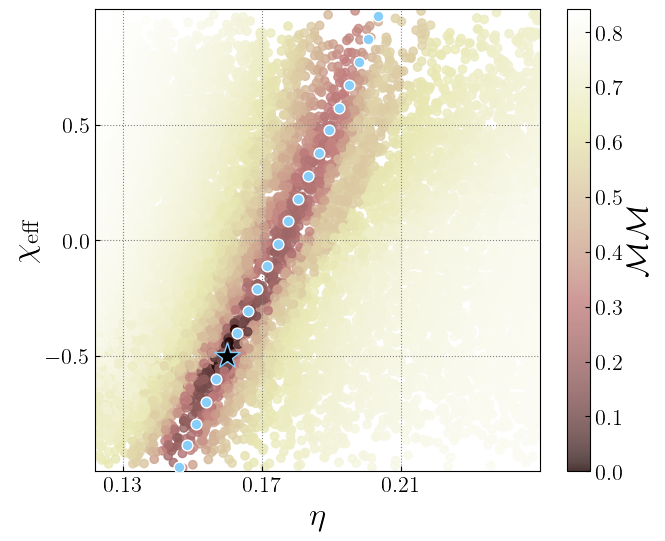

In [8]:
plot(mapper1, lam0, ndims, dimensions)

# Mapping in aligned space $\left[q, \chi_{1 z}, \chi_{2 z}\right]$

In [9]:
ndims = 3
dimensions = ['q', 'z1', 'z2']
mapper2 = run(lam0, ndims, dimensions, stepsize = 0.4, SNR = 8)

100%|██████████| 10000/10000 [00:00<00:00, 12823.35it/s]


####################################
MAPPING FORWARD DIRECTION
313/313 [==============================] - 0s 1ms/step
Size after rejection sampling: 125
Computing new vector
mapping to direction: [-0.3238346   0.33653403  0.03437023]
currently at  [4.0, -0.5, -0.5]
proposed start at  [ 3.9252136  -0.42228079 -0.49206254]
new start at  [ 3.9252136  -0.42228079 -0.49206254]
1/1 [==============================] - 0s 78ms/step
-----
313/313 [==============================] - 0s 1ms/step
Size after rejection sampling: 146
Computing new vector
mapping to direction: [-0.33552286  0.33284864  0.05906982]
currently at  [ 3.9252136  -0.42228079 -0.49206254]
proposed start at  [ 3.84772792 -0.34541269 -0.47842095]
new start at  [ 3.84772792 -0.34541269 -0.47842095]
1/1 [==============================] - 0s 72ms/step
-----
313/313 [==============================] - 0s 1ms/step
Size after rejection sampling: 123
Computing new vector
mapping to direction: [-0.28445586  0.23912197  0.24668595]
curren

100%|██████████| 9999/9999 [00:00<00:00, 10715.05it/s]

  1/313 [..............................] - ETA: 12s

313/313 [==============================] - 0s 1ms/step


/tmp/ipykernel_3098877/512707569.py:56: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sc,label= '$\mathcal{MM}$',fraction=0.13, cmap = cmap)


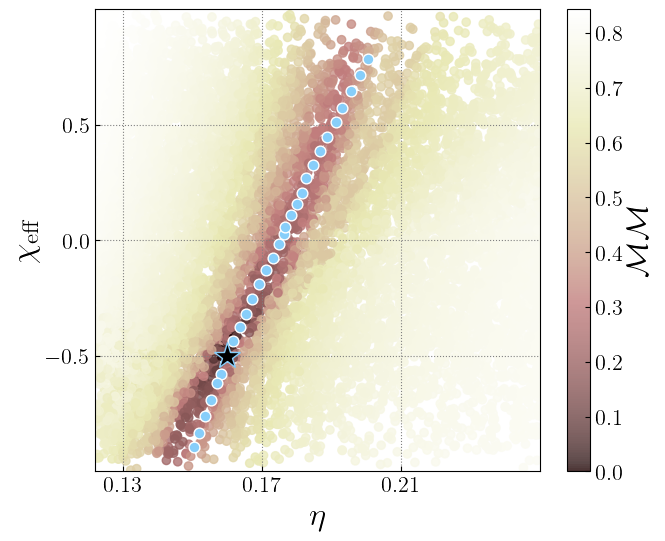

In [10]:
plot(mapper2, lam0, ndims, dimensions)

# Mapping in precession space $\left(\eta, \chi_1\right)$

In [11]:
lam0 = [0.16, 0.5, 0, 0, 0, 0, 0]

In [16]:
ndims = 2
dimensions = ['eta', 'inplane1']
mapper3 = run(lam0, ndims, dimensions, stepsize = 0.2, SNR = 10)

100%|██████████| 10000/10000 [00:00<00:00, 15430.74it/s]


####################################
MAPPING FORWARD DIRECTION
313/313 [==============================] - 0s 1ms/step
Size after rejection sampling: 189
Computing new vector
mapping to direction: [0.00076162 0.25061708]
currently at  [0.16, 0.5]
proposed start at  [0.16010771 0.53544261]
new start at  [0.16010771 0.53544261]
1/1 [==============================] - 0s 64ms/step
-----
313/313 [==============================] - 0s 1ms/step
Size after rejection sampling: 188
Computing new vector
mapping to direction: [0.00081949 0.25257648]
currently at  [0.16010771 0.53544261]
proposed start at  [0.1602236  0.57116232]
new start at  [0.1602236  0.57116232]
1/1 [==============================] - 0s 68ms/step
-----
313/313 [==============================] - 0s 1ms/step
Size after rejection sampling: 203
Computing new vector
mapping to direction: [0.00087642 0.26358087]
currently at  [0.1602236  0.57116232]
proposed start at  [0.16034755 0.60843828]
new start at  [0.16034755 0.60843828]
1/1 [

100%|██████████| 9999/9999 [00:01<00:00, 8428.02it/s] 


313/313 [==============================] - 0s 1ms/step


/tmp/ipykernel_3098877/512707569.py:56: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sc,label= '$\mathcal{MM}$',fraction=0.13, cmap = cmap)


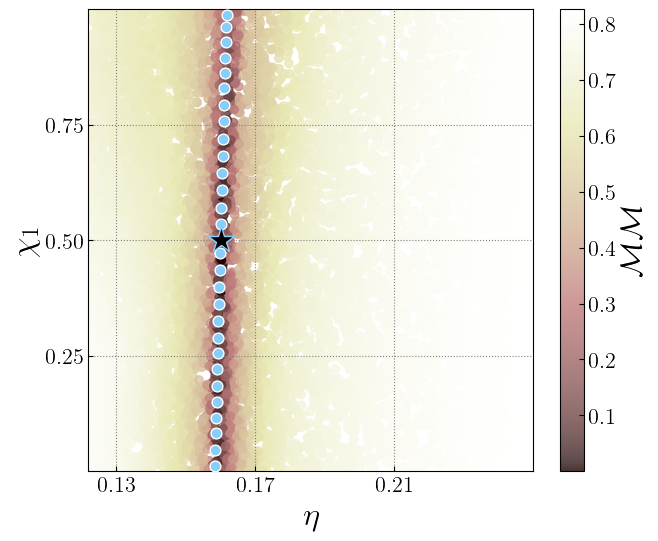

In [17]:
plot(mapper3, lam0, ndims, dimensions)